<a href="https://colab.research.google.com/github/himanshigarg01/bank-marketing-dataset/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective:- To classify whether a particular individual would subscribe to a Term Deposit based on the given information.

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.pipeline import make_pipeline, Pipeline

# libraries required for preprocessing of data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder, StandardScaler, Normalizer
from imblearn.over_sampling import SMOTE

# libraries required for feature selection of data
from sklearn.decomposition import PCA

# libraries required for training the model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries required for validation of model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from tabulate import tabulate



In [ ]:
# Load the dataset and use the delimiter for proper seperation
df = pd.read_csv('/content/bank-full.csv', delimiter = ";")
print(df.head(5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# checking the various columns in the dataframe
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# checking the missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Check number of unique values in each variable (hence Binary Classification)
df.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [ ]:
# Check whether the df is balanced or not
df['y'].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
# Describe the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


In [ ]:
# Combine the unknown and other of poutcome in one
df['poutcome'].replace('unknown', 'other', inplace=True)

<ipython-input-94-4934b1630005>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poutcome'].replace('unknown', 'other', inplace=True)


In [ ]:
df['poutcome'].value_counts()

,count
poutcome,
other,38799
failure,4901
success,1511


In [ ]:
# One hot encoding (marital, job, education, poutcome)
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)

# Convert categorical columns into a 2D array or DataFrame
df_to_encode = df[['job', 'marital', 'education', 'contact', 'poutcome']]

# Fit and transform the specified columns
df_encoded = ohe.fit_transform(df_to_encode)

# Convert the result into a DataFrame with the column names
df_encoded = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out(['job', 'marital', 'education', 'contact', 'poutcome']))

# Show the resulting encoded DataFrame
print(df_encoded.head())

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  ...  education_primary  education_secondary  \
0               0  ...                  0         

In [ ]:
# organising the df
new_df = pd.concat([df, df_encoded], axis=1)
new_df = new_df.drop(columns=['job', 'marital', 'education', 'contact', 'poutcome'], axis=1)
new_df = new_df[[col for col in new_df if col != 'y'] + ['y']]
print(new_df.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'y'],
      dtype='object')


In [ ]:
# Label Encoding
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in ['default', 'housing', 'loan', 'y']:
    new_df[column] = le.fit_transform(df[column])

# Show the resulting encoded DataFrame
print(new_df.head())

   age  default  balance  housing  loan  day month  duration  campaign  pdays  \
0   58        0     2143        1     0    5   may       261         1     -1   
1   44        0       29        1     0    5   may       151         1     -1   
2   33        0        2        1     1    5   may        76         1     -1   
3   47        0     1506        1     0    5   may        92         1     -1   
4   33        0        1        0     0    5   may       198         1     -1   

   ...  education_secondary  education_tertiary  education_unknown  \
0  ...                    0                   1                  0   
1  ...                    1                   0                  0   
2  ...                    1                   0                  0   
3  ...                    0                   0                  1   
4  ...                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0              

In [ ]:
# Function to convert month name to month number
def month_to_number(month_name):
    return datetime.strptime(month_name, '%b').month

# Apply the function to the 'month' column
new_df['month'] = new_df['month'].apply(month_to_number)

In [ ]:
# Observe the imbalanced dataset (use SMOTE)
smote = SMOTE(random_state=42)

# Separate features and target
X = new_df.iloc[:, 0:34]  # Features
y = new_df.iloc[:, -1]     # Target

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
new_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
new_df_resampled[y.name] = y_resampled

# Display the first 5 rows of the resampled DataFrame
print(new_df_resampled.head(5))

   age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  marital_single  education_primary  education_secondary  \
0     -1  ...               0                  0                    0   
1     -1  ...               1                  0                    1   
2     -1  ...               0                  0                    1   
3     -1  ...               0                  0                    0   
4     -1  ...               1                  0                    0   

   education_tertiary  education_unknown  contact_cellular  contact_telephone  \
0                   1        

In [ ]:
# Check whether the new_df_resampled is balanced or not
new_df_resampled['y'].value_counts()

,count
y,
0,39922
1,39922


In [ ]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(new_df_resampled.iloc[:,0:34], new_df_resampled.iloc[:,-1], test_size = 0.2, random_state = 35)
print(x_train.shape, y_train.shape)

(63875, 34) (63875,)


In [ ]:
# # Initialize models
# models = {
#     "Linear Regression":  LinearRegression(),
#     "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
#     "Decision Tree": DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
#     "Naive Bayes": GaussianNB(),
#     "SVM" : SVC(kernel = 'linear', random_state = 42),
#     "KNN": KNeighborsClassifier(),
#     "RandOm Forest": RandomForestClassifier(random_state=42)
# }

In [ ]:
# y_pred_data = []
# # Iterate over the models and predictions
# for model_name, model in models.items():
#     # Make predictions
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     y_pred_data.append({
#         "model_name": model_name,
#         "y_pred": y_pred
#     })

In [ ]:
# using linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin = lin_reg.predict(x_test)
cv_scores = cross_val_score(lin_reg, x_train, y_train, cv=5)
cv_scores_mean_lin = round(np.mean(cv_scores),2)

In [ ]:
# using logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
cv_scores = cross_val_score(log_reg, x_train, y_train, cv=5)
cv_scores_mean_log = round(np.mean(cv_scores),2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# using decision tree
dec_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dec_tree.fit(x_train, y_train)
y_pred_dt = dec_tree.predict(x_test)
cv_scores = cross_val_score(dec_tree, x_train, y_train, cv=5)
cv_scores_mean_dt = round(np.mean(cv_scores),2)

In [ ]:
# using logistic regression
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
cv_scores = cross_val_score(nb, x_train, y_train, cv=5)
cv_scores_mean_nb = round(np.mean(cv_scores),2)

In [ ]:
# using SVM
# svm = SVC(kernel = 'linear', random_state = 42)
# svm.fit(x_train, y_train)
# y_pred_svm = svm.predict(x_test)
# cv_scores = cross_val_score(svm, x_train, y_train, cv=5)
# cv_scores_mean_svm = round(np.mean(cv_scores),2)

In [ ]:
# using KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
cv_scores_mean_knn = round(np.mean(cv_scores),2)

In [ ]:
# using random forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(x_train, y_train)
y_pred_rf = rand_forest.predict(x_test)
cv_scores = cross_val_score(rand_forest, x_train, y_train, cv=5)
cv_scores_mean_rf = round(np.mean(cv_scores),2)

In [ ]:
models_y_pred = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Naive Bayes": y_pred_nb,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf
}
model_cv_score = {
    "Logistic Regression": cv_scores_mean_log,
    "Decision Tree": cv_scores_mean_dt,
    "Naive Bayes": cv_scores_mean_nb,
    "KNN": cv_scores_mean_knn,
    "Random Forest": cv_scores_mean_rf
}

In [ ]:
# Evaluating using accuracy_score metric
# accuracy_linreg = accuracy_score(y_test, y_pred_lin)
accuracy_logreg = accuracy_score(y_test, y_pred_log)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dectree = accuracy_score(y_test, y_pred_dt)
accuracy_ranfor = accuracy_score(y_test, y_pred_rf)
# print("Linear Regression: " + str(accuracy_linreg * 100))
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 83.24879453942012
K Nearest neighbors: 87.35049157743127
Naive Bayes: 83.84995929613626
Decision tree: 91.4396643496775
Random Forest: 94.55820652514247


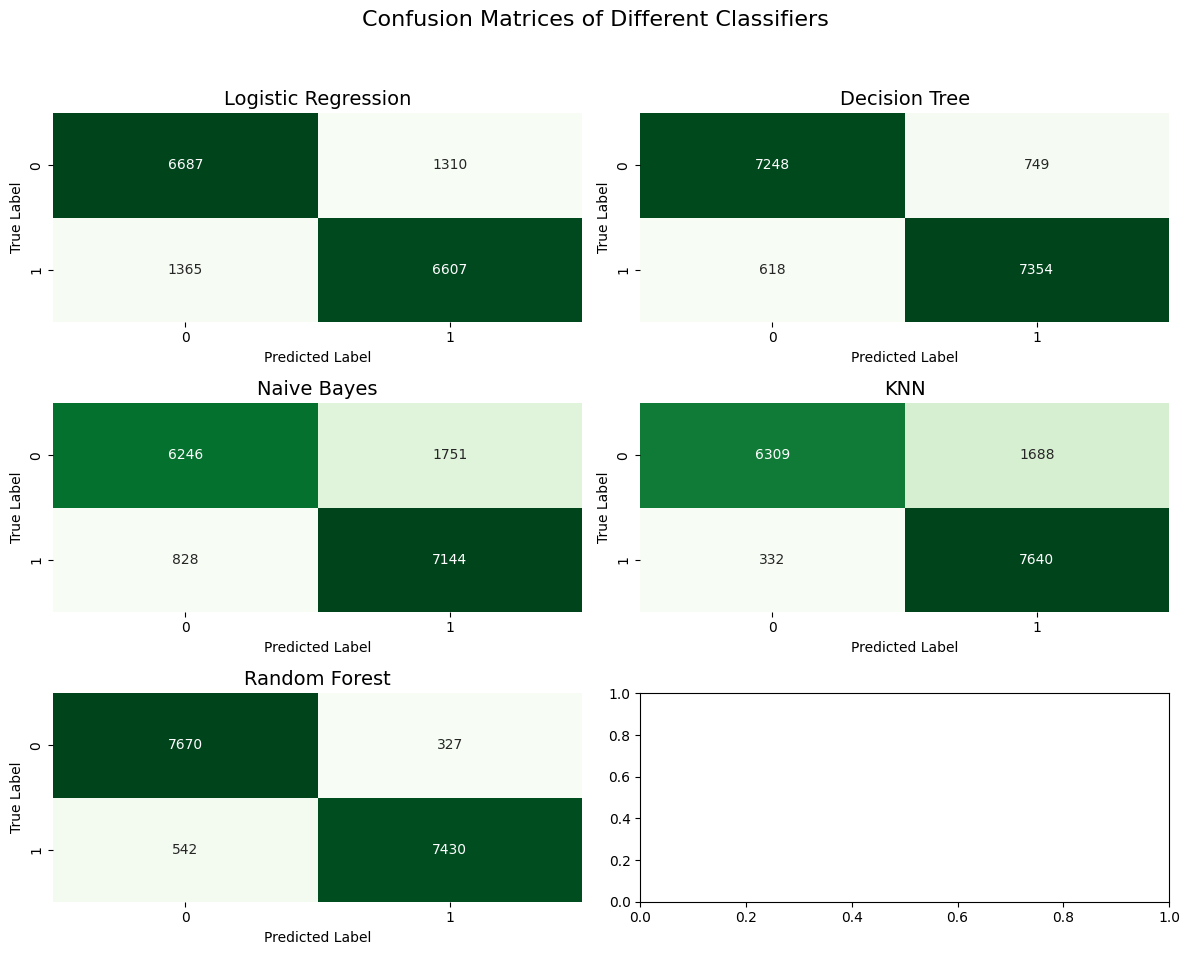

In [ ]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices of Different Classifiers", fontsize=16)

# Iterate through models and their predictions
for ax, (model_name, y_pred) in zip(axes.flatten(), models_y_pred.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Greens', cbar=False)
    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=10)
    ax.set_ylabel('True Label', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from tabulate import tabulate

# Initialize an empty list to hold the report data
report_data = []

# Iterate through the models and their predictions
for model_name, y_pred in models_y_pred.items():
    report = classification_report(y_test, y_pred, output_dict=True)

    # Get the accuracy score
    accuracy = round(report['accuracy'], 2)

    # Collect overall metrics for the model
    report_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': round(report['macro avg']['precision'], 2),
        'Recall': round(report['macro avg']['recall'], 2),
        'F1-Score': round(report['macro avg']['f1-score'], 2),
        'Support': sum(report[label]['support'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']),
        'CV Score': model_cv_score.get(model_name, None)  # Get cross-validation score
    })

# Create a DataFrame from the report data
report_final = pd.DataFrame(report_data)

# Sort the DataFrame by Accuracy in descending order
report_final = report_final.sort_values(by='Accuracy', ascending=False)

# Print the final report in a grid format
print(tabulate(report_final.T, tablefmt='grid'))

+-----------+---------------+---------------+---------+-------------+---------------------+
| Model     | Random Forest | Decision Tree | KNN     | Naive Bayes | Logistic Regression |
+-----------+---------------+---------------+---------+-------------+---------------------+
| Accuracy  | 0.95          | 0.91          | 0.87    | 0.84        | 0.83                |
+-----------+---------------+---------------+---------+-------------+---------------------+
| Precision | 0.95          | 0.91          | 0.88    | 0.84        | 0.83                |
+-----------+---------------+---------------+---------+-------------+---------------------+
| Recall    | 0.95          | 0.91          | 0.87    | 0.84        | 0.83                |
+-----------+---------------+---------------+---------+-------------+---------------------+
| F1-Score  | 0.95          | 0.91          | 0.87    | 0.84        | 0.83                |
+-----------+---------------+---------------+---------+-------------+-----------

In [ ]:
# Trying hyperparameter tuning

# using random forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(x_train, y_train)
# y_pred_rf = rand_forest.predict(x_test)
cv_scores = cross_val_score(rand_forest, x_train, y_train, cv=5)
cv_scores_mean_rf2 = round(np.mean(cv_scores),2)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9447514677103719
